In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from collections import Counter

In [58]:
#load data recorded in main notebook
s4 = list(np.loadtxt("L_4_avalanche_size_counts.txt"))[15000:]
s8 = list(np.loadtxt("L_8_avalanche_size_counts.txt"))[15000:]
s16 = list(np.loadtxt("L_16_avalanche_size_counts.txt"))[15000:]
s32 = list(np.loadtxt("L_32_avalanche_size_counts.txt"))[15000:]
s64 = list(np.loadtxt("L_64_avalanche_size_counts.txt"))[15000:]
s128 = list(np.loadtxt("L_128_avalanche_size_counts.txt"))[20000:]
s256 = list(np.loadtxt("L_256_avalanche_size_counts.txt"))[20000:]

In [3]:
def logbin(data, scale = 1, zeros = False):
    """
    logbin(data, scale = 1., zeros = False)

    Log-bin frequency of unique integer values in data. Returns probabilities
    for each bin.

    Array, data, is a 1-d array containing full set of event sizes for a
    given process in no particular order. For instance, in the Oslo Model
    the array may contain the avalanche size recorded at each time step. For
    a complex network, the array may contain the degree of each node in the
    network. The logbin function finds the frequency of each unique value in
    the data array. The function then bins these frequencies in logarithmically
    increasing bin sizes controlled by the scale parameter.

    Minimum binsize is always 1. Bin edges are lowered to nearest integer. Bins
    are always unique, i.e. two different float bin edges corresponding to the
    same integer interval will not be included twice. Note, rounding to integer
    values results in noise at small event sizes.

    Parameters
    ----------

    data: array_like, 1 dimensional, non-negative integers
          Input array. (e.g. Raw avalanche size data in Oslo model.)

    scale: float, greater or equal to 1.
          Scale parameter controlling the growth of bin sizes.
          If scale = 1., function will return frequency of each unique integer
          value in data with no binning.

    zeros: boolean
          Set zeros = True if you want binning function to consider events of
          size 0.
          Note that output cannot be plotted on log-log scale if data contains
          zeros. If zeros = False, events of size 0 will be removed from data.

    Returns
    -------

    x: array_like, 1 dimensional
          Array of coordinates for bin centres calculated using geometric mean
          of bin edges. Bins with a count of 0 will not be returned.
    y: array_like, 1 dimensional
          Array of normalised frequency counts within each bin. Bins with a
          count of 0 will not be returned.
    """
    if scale < 1:
        raise ValueError('Function requires scale >= 1.')
    count = np.bincount(data)
    tot = np.sum(count)
    smax = np.max(data)
    if scale > 1:
        jmax = np.ceil(np.log(smax)/np.log(scale))
        if zeros:
            binedges = scale ** np.arange(jmax + 1)
            binedges[0] = 0
        else:
            binedges = scale ** np.arange(1,jmax + 1)
            # count = count[1:]
        binedges = np.unique(binedges.astype('uint64'))
        x = (binedges[:-1] * (binedges[1:]-1)) ** 0.5
        y = np.zeros_like(x)
        count = count.astype('float')
        for i in range(len(y)):
            y[i] = np.sum(count[binedges[i]:binedges[i+1]]/(binedges[i+1] - binedges[i]))
            # print(binedges[i],binedges[i+1])
        # print(smax,jmax,binedges,x)
        # print(x,y)
    else:
        x = np.nonzero(count)[0]
        y = count[count != 0].astype('float')
        if zeros != True and x[0] == 0:
            x = x[1:]
            y = y[1:]
    y /= tot
    x = x[y!=0]
    y = y[y!=0]
    return x,y

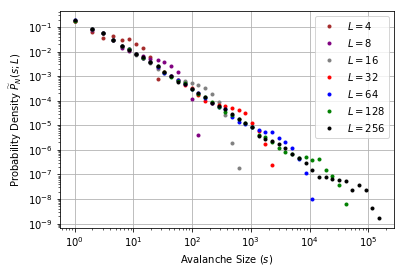

In [33]:
scl =1.3 #varied this until it looked the best

point = "."

x,y = logbin(s4,scale = scl)
plt.loglog(x,y,point,color = "brown", label = "$L = 4$")
x,y = logbin(s8,scale = scl)
plt.loglog(x,y,point,color = "purple", label = "$L = 8$")
x,y = logbin(s16,scale = scl)
plt.loglog(x,y,point,color = "gray", label = "$L = 16$")
x,y = logbin(s32,scale = scl)
plt.loglog(x,y,point,color = "red", label = "$L = 32$")
x,y = logbin(s64,scale = scl)
plt.loglog(x,y,point, color = "blue", label = "$L = 64$")
x,y = logbin(s128,scale = scl)
plt.loglog(x,y,point, color = "green", label = "$L = 128$")
x,y = logbin(s256,scale = scl)
plt.loglog(x,y,point, color = "black", label = "$L = 256$")


plt.grid()
plt.xlabel("Avalanche Size ($s$)")
plt.ylabel("Probability Density $\\widetilde{P}_{N}(s;L)$")
plt.legend()
#plt.savefig("avalanche_size_probability_density.pdf")

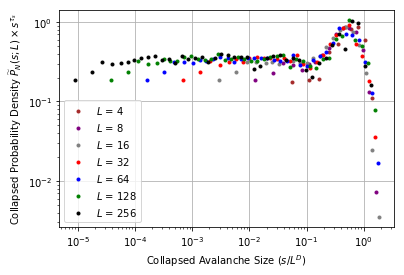

In [41]:
#above I have plotted the binned probability density in loglog axis for different sized systems
#now I need to perform a data collapse to extract the avalanche Dimension D and and the avalanche exponent t_s
#to collapse the data according to the finite scaling ansatz we need to multiply the y-axis aby s**(t_s) and the x-axis by
#L*D
#we will start with
t_s = 1.55
D = 2.25

scl =1.3

#will define a new function for convinience

def collapsed_logbin(data, scale = 1, zeros = False, D = 2.1, t_s = 1.54, L = 4):
    #print ("scale = " + str(scale))
    x,y = logbin(data,scale,zeros)
    return x/L**D, y * (x**t_s)

x,y = collapsed_logbin(s4,scale = scl, L =4)
plt.loglog(x,y,".", label = "$L$ = 4",color = "brown")
x,y = collapsed_logbin(s8,scale = scl, L =8)
plt.loglog(x,y,".", label = "$L$ = 8",color = "purple")
x,y = collapsed_logbin(s16,scale = scl, L =16)
plt.loglog(x,y,".", label = "$L$ = 16",color = "gray")
x,y = collapsed_logbin(s32,scale = scl, L =32)
plt.loglog(x,y,".", label = "$L$ = 32",color = "red")
x,y = collapsed_logbin(s64,scale = scl, L =64)
plt.loglog(x,y,".", label = "$L$ = 64", color = "blue")
x,y = collapsed_logbin(s128,scale = scl, L =128)
plt.loglog(x,y,".", label = "$L$ = 128", color = "green")
x,y = collapsed_logbin(s256,scale = scl, L =256)
plt.loglog(x,y,".", label = "$L$ = 256", color = "black")

plt.grid()
plt.xlabel("Collapsed Avalanche Size ($s / L^{D}$)")
plt.ylabel("Collapsed Probability Density $\\widetilde{P}_{N}(s;L)  \\times s^{\\tau_s}$")
plt.legend()
#plt.savefig("avalanche_size_prob_data_collapse.pdf")


## Task 3c

We perform moment analysis on the collected data in order extract the avalanche dimension $D$ and the
avalanche size exponent $\tau_s$

In [24]:
#first we need a function that will produce the kth moment of a set of avalanche sizes
def kth_moment(s,k = 1):
    """
    s is an array containing avalanche sizes and k the the expoment of the moment we wish to calculate
    """
    s = np.asarray(s)
    return np.mean(s**k)

#try with some of the above data
a = kth_moment(s16)
print(a)

15.997685714285714


1
-0.00046212567748793454 0.0019806457178943803
2
-0.8990407332223922 0.1617217489261068
3
-1.440770144345573 0.265357496145761
4
-1.7648551212438859 0.35544843579185686
5
-1.9431011910362592 0.4402274835797522
6
-2.011068216198801 0.5198488279440404
7
-1.9869419399526689 0.5920923504947084


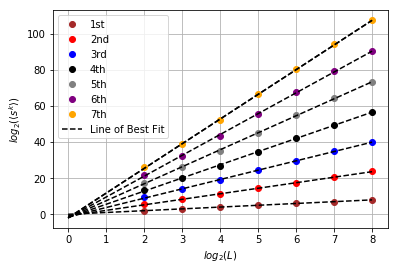

In [49]:
#we need this to be applied to all system sizes
sizes = [4,8,16,32,64,128,256]
systems = [s4,s8,s16,s32,s64,s128,s256]

sizes = sizes[0:]
systems = systems[0:]
def line(x,slope,intercept):
    return slope*x + intercept

#get data for all moments
slopes = []
errors = []
colours = ["brown","red","blue","black","gray","purple","orange"]
labels = ["1st","2nd","3rd","4th","5th","6th","7th"]

for i in range(1,8):
    #print(i)
    moments2 = []
    stds =[]
    for s in systems:
        moments2.append(kth_moment(s,k=i))

    #we can now fit a straight line to the logarytms of the above
    x = np.log2(sizes)
    y = np.log2(moments2)

    coeff, cov = curve_fit(line,x,y)
    #print (coeff[1],np.sqrt(cov[1,1]))

    #print("the slope is " + str(coeff[0]) + "+-" + str(np.sqrt(cov[0,0])))
    #print("the intercept is " + str(coeff[1]) + "+-" + str(np.sqrt(cov[1,1])))

    space = np.arange(x[0]-2,x[-1],0.01) #define some space to plot over

    plt.plot(x,y,"o",color = colours[i-1], label = labels[i-1])
    plt.plot(space,line(space,*coeff),"--",color = "black")
    
    
    slopes.append(coeff[0])
    errors.append(np.sqrt(cov[0,0]))
    
plt.plot(space,line(space,*coeff),"--",color = "black",label = "Line of Best Fit")    

#plt.xlim([0,9])
plt.xlabel("$log_2(L)$")
plt.ylabel("$log_2(\\langle s^k \\rangle)$")
plt.grid()    
plt.legend()
#plt.savefig("k_th_moment_logL.pdf")

In [51]:
print (slopes)
print (errors)

[1.0002267661106758, 3.0691628747883297, 5.183113093441266, 7.305507499918288, 9.43451995598777, 11.568333192740525, 13.704526561385167]
[0.00036779649975007844, 0.030030973968332788, 0.04927565010697362, 0.06600511429800412, 0.0817481999493418, 0.09653351276672711, 0.10994878873560819]


the slope is 2.1200945313960817+-0.004503584761508673
the intercept is -1.1567509904888933+-0.020140643165307864
1.5456129306305852 +- 0.009734480040293099


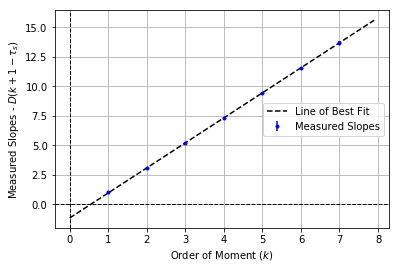

In [55]:
k = np.array([1,2,3,4,5,6,7])
coeff, cov = curve_fit(line,k,slopes)

print("the slope is " + str(coeff[0]) + "+-" + str(np.sqrt(cov[0,0])))
print("the intercept is " + str(coeff[1]) + "+-" + str(np.sqrt(cov[1,1])))

space = np.arange(0,8,0.1) #just for plotting
plt.errorbar(k,slopes,yerr = errors, marker = ".",label = "Measured Slopes",color = "blue", linestyle = '')
plt.plot(space,line(space,*coeff),"--",color = "black",label = "Line of Best Fit")
plt.grid()
plt.legend()
plt.xlabel("Order of Moment ($k$)")
plt.ylabel("Measured Slopes - $D(k + 1 - \\tau_{s})$")
plt.axhline(y=0,linestyle = "--",linewidth = 1, color='k')
plt.axvline(x=0,linestyle = "--",linewidth = 1, color='k')

D = coeff[0]
intcpt = coeff[1]
t_s_estimate = (D-intcpt)/D
t_s_error = np.sqrt(cov[0,0] + cov[1,1]) / D
print(str(t_s_estimate) + " +- " + str(t_s_error) )
#plt.savefig("moment_analysis.pdf")